<a href="https://colab.research.google.com/github/chemoinformatics-lecture/lecture-beginner/blob/main/lesson07_automl/lecture_note_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 行うこと

0. ライブラリーやデータのインポート
1. データの前処理：　setup()
2. モデルの比較： compare_models()
3. 分析モデルの生成： create_model()
4. チューニング： tune_model()
5. 可視化： plot_model()
6. 評価： evaluate_model()
7. 予測： finalize_model(), predict_model()

# 0. ライブラリーのインストール

In [1]:
!pip install rdkit
!pip install pycaret==2.2.0
!pip install pandas-profiling==3.1.0
!pip install shap
!pip install scikit-learn==0.23.2 --force-reinstall

# pandas-profilingのversionを落とさないと次のエラーが出る。
# PyCaret ImportError: Missing optional dependency 'Jinja2'
# https://qiita.com/hasegatk/items/c835ba6243efbb4e53d2
# scikit-learn==0.23.2にでないとエラーがでる部分がある。

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.5 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 248 kB 4.3 MB/s 
     |████████████████████████████████| 2.0 MB 56.5 MB/s 
     |████████████████████████████████| 17.0 MB 209 kB/s 
     |████████████████████████████████| 88 kB 6.8 MB/s 
     |████████████████████████████████| 315 kB 52.2 MB/s 
     |████████████████████████████████| 141 kB 55.0 MB/s 
     |████████████████████████████████| 1.7 MB 42.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 255.9 MB 43 kB/s 
     |████████████████████████████████| 76.8 MB 1.1 MB/s 
     |████████████████████████████████| 1.6 MB 59.3 MB/s

# 0. ライブラリーのインポート

In [2]:
import pandas as pd
from pycaret.classification import *

In [3]:
print(pycaret.__version__)  # 2.2.0が表示

2.2.0


In [4]:
import sklearn
print(sklearn.__version__) # 0.23.2が表示

0.23.2


# データのインポート

In [5]:
# 使用するデータの読み込み 
from pycaret.datasets import get_data 
data = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [6]:
# 95％を学習データ、5%をテストデータ(Unseen Dataと呼ぶ)に分ける
employee_data = data.sample(frac =0.95, random_state = 786).reset_index(drop=True)
employee_data_unseen = data.drop(employee_data.index).reset_index(drop=True)
print('Data for Modeling: ' + str(employee_data.shape))
print('Unseen Data For Predictions: ' + str(employee_data_unseen.shape))

Data for Modeling: (14249, 10)
Unseen Data For Predictions: (750, 10)


# 1. データの前処理

In [8]:
exp1 = setup(employee_data, target = 'left', ignore_features = None)

,Description,Value
0,session_id,4092
1,Target,left
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(14249, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 0
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='left',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

# 2. モデルの比較

In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9882,0.9911,0.9785,0.9882,0.9881,0.9667,0.9670,0.932
xgboost,Extreme Gradient Boosting,0.9862,0.9916,0.9772,0.9861,0.9861,0.9612,0.9614,1.510
lightgbm,Light Gradient Boosting Machine,0.9854,0.9926,0.9757,0.9854,0.9853,0.9589,0.9591,0.229
catboost,CatBoost Classifier,0.9836,0.9922,0.9721,0.9836,0.9835,0.9538,0.9541,4.410
et,Extra Trees Classifier,0.9816,0.9902,0.9723,0.9816,0.9815,0.9485,0.9486,1.124
dt,Decision Tree Classifier,0.9771,0.9728,0.9728,0.9776,0.9773,0.9371,0.9373,0.059
gbc,Gradient Boosting Classifier,0.9763,0.9881,0.9594,0.9763,0.9761,0.9331,0.9336,1.203
ada,Ada Boost Classifier,0.9605,0.9815,0.9414,0.9604,0.9603,0.8894,0.8897,0.449
knn,K Neighbors Classifier,0.9340,0.9661,0.9217,0.9365,0.9348,0.8213,0.8224,0.166
lr,Logistic Regression,0.8926,0.9345,0.8543,0.8938,0.8929,0.7034,0.7040,0.924


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 1
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4092, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4092, verbose=0,
                       warm_start=False)

# 3. モデルの生成

In [10]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9890,0.9949,0.9810,0.9890,0.9889,0.9692,0.9693
1,0.9950,0.9994,0.9908,0.9950,0.9950,0.9860,0.9861
2,0.9880,0.9909,0.9804,0.9879,0.9879,0.9664,0.9665
3,0.9870,0.9930,0.9782,0.9869,0.9869,0.9636,0.9636
4,0.9900,0.9925,0.9801,0.9900,0.9899,0.9717,0.9720
5,0.9819,0.9844,0.9630,0.9822,0.9817,0.9485,0.9495
6,0.9880,0.9916,0.9818,0.9879,0.9879,0.9664,0.9664
7,0.9840,0.9889,0.9688,0.9841,0.9838,0.9545,0.9551
8,0.9920,0.9851,0.9844,0.9920,0.9919,0.9775,0.9776
9,0.9870,0.9906,0.9768,0.9870,0.9869,0.9634,0.9636


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4092, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


# 4. チューニング： tune_model()

これを実行した結果（最適化後）と実行前を比較すると、最適化対象とした評価指標が増加し最適化が行われたことが確認できます。※PyCaretの最適化はランダムグリッドサーチが採用されています。これを実行した結果（最適化後）と実行前を比較すると、最適化対象とした評価指標が増加し最適化が行われたことが確認できます。※PyCaretの最適化はランダムグリッドサーチが採用されています。

In [11]:
tuned_rf = tune_model(rf, n_iter = 10, optimize = 'Accuracy')
# より最適化の精度を上げる場合には、n_iter = 500 のように数字を増やす。時間短縮のために少なめにしている。

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9840,0.9929,0.9763,0.9839,0.9839,0.9553,0.9554
1,0.9840,0.9921,0.9718,0.9840,0.9839,0.9549,0.9552
2,0.9719,0.9849,0.9566,0.9718,0.9718,0.9214,0.9215
3,0.9739,0.9892,0.9565,0.9738,0.9737,0.9266,0.9269
4,0.9799,0.9875,0.9647,0.9799,0.9798,0.9433,0.9437
5,0.9709,0.9799,0.9499,0.9708,0.9706,0.9174,0.9181
6,0.9749,0.9878,0.9644,0.9749,0.9749,0.9301,0.9301
7,0.9719,0.9886,0.9476,0.9720,0.9715,0.9197,0.9209
8,0.9829,0.9858,0.9666,0.9831,0.9828,0.9516,0.9523
9,0.9699,0.9815,0.9509,0.9697,0.9697,0.9152,0.9156


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.002,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=80, n_jobs=-1, oob_score=False,
                       random_state=4092, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# 5. 可視化： plot_model()

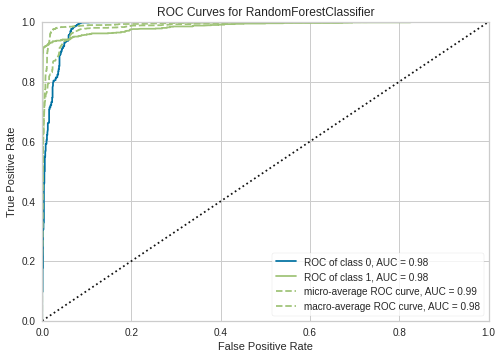

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [12]:
plot_model(tuned_rf)

# 6. 評価 : evaluate_mode

In [13]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.002,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=80, n_jobs=-1, oob_score=False,
                       random_state=4092, verbose=0, warm_start=False), fold=None, fit_kwargs=None, feature_name=None, groups=None)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 7. 予測： finalize_model(), predict_model()

In [14]:
final_rf = finalize_model(tuned_rf)
print(final_rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.002,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=80, n_jobs=-1, oob_score=False,
                       random_state=4092, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.002,
     

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.002,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=80, n_jobs=-1, oob_score=False,
                       random_state=4092, verbose=0, warm_start=False)


In [15]:
#予測の実行
unseen_predictions = predict_model(final_rf, data = employee_data_unseen)
print(unseen_predictions)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.002,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=80, n_jobs=-1, oob_score=False,
                       random_state=4092, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


     satisfaction_level  last_evaluation  number_project  \
0                  0.11             0.89               6   
1                  0.41             0.54               2   
2                  0.87             0.88               5   
3                  0.45             0.48               2   
4                  0.40             0.46               2   
..                  ...              ...             ...   
745                0.40             0.57               2   
746                0.37             0.48               2   
747                0.37             0.53               2   
748                0.11             0.96               6   
749                0.37             0.52               2   

     average_montly_hours  time_spend_company  Work_accident  \
0                     306                   4              0   
1                     152                   3              0   
2                     269                   5              0   
3                     1